# Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import seaborn as sns
from itertools import product
import random
from typing import List, Tuple

from reader import parse_csvs, SimulationResults

# Clean CSV Data Files

In [9]:
from io import TextIOWrapper
import os 
for file in [file for file in os.listdir("data") if file.startswith("Attempt")]:
    file_path: str = f"data/{file}"
    f: TextIOWrapper = open(file_path, 'r')
    lines: list[str] = f.readlines()
    if lines[0].strip().endswith(";"):
        print(f"Fixing file {file_path}")
        lines[0] = lines[0].strip()[:-1] + "\n"
    f.close()

    f = open(file_path, 'w')
    f.writelines(lines)
    f.close()

Fixing file data/Attempt 1 - 09.05.2024 09-47-19.csv
Fixing file data/Attempt 10 - 09.05.2024 10-25-12.csv
Fixing file data/Attempt 100 - 09.05.2024 04-49-16.csv
Fixing file data/Attempt 101 - 09.05.2024 04-53-57.csv
Fixing file data/Attempt 102 - 09.05.2024 04-58-39.csv
Fixing file data/Attempt 103 - 09.05.2024 05-03-20.csv
Fixing file data/Attempt 104 - 09.05.2024 05-08-01.csv
Fixing file data/Attempt 105 - 09.05.2024 05-12-43.csv
Fixing file data/Attempt 106 - 09.05.2024 05-17-24.csv
Fixing file data/Attempt 107 - 09.05.2024 05-22-05.csv
Fixing file data/Attempt 108 - 09.05.2024 05-26-47.csv
Fixing file data/Attempt 109 - 09.05.2024 05-31-28.csv
Fixing file data/Attempt 11 - 09.05.2024 10-29-53.csv
Fixing file data/Attempt 110 - 09.05.2024 05-36-07.csv
Fixing file data/Attempt 111 - 09.05.2024 05-40-48.csv
Fixing file data/Attempt 112 - 09.05.2024 05-45-30.csv
Fixing file data/Attempt 113 - 09.05.2024 05-50-11.csv
Fixing file data/Attempt 114 - 09.05.2024 05-54-52.csv
Fixing file da

# Get Data

In [2]:
simulation_results: List[SimulationResults] = parse_csvs()

Started parsing...
Excluding extinct result 109 - 09.05.2024 05-31-28
Excluding extinct result 116 - 09.05.2024 06-04-15
Excluding extinct result 123 - 09.05.2024 06-34-18
Excluding extinct result 134 - 09.05.2024 07-23-55
Excluding extinct result 135 - 09.05.2024 07-26-55
Excluding extinct result 137 - 09.05.2024 07-34-52
Excluding extinct result 142 - 09.05.2024 07-53-57
Excluding extinct result 145 - 09.05.2024 08-05-58
Excluding extinct result 154 - 09.05.2024 08-44-20
Excluding extinct result 155 - 09.05.2024 08-44-46
Excluding extinct result 162 - 09.05.2024 09-14-56
Excluding extinct result 164 - 09.05.2024 09-20-27
Excluding extinct result 168 - 09.05.2024 09-37-14
Excluding extinct result 180 - 09.05.2024 10-29-14
Excluding extinct result 181 - 09.05.2024 10-30-57
Error parsing file Initial settings 182 - 09.05.2024 10-33-28.csv: [Errno 2] No such file or directory: 'c:\\Users\\janta\\Desktop\\MSiDProject\\data\\Attempt 182 - 09.05.2024 10-33-28.csv'
Excluding extinct result 2

In [3]:
simulation_results

[SimulationResults(index=0, date=datetime.datetime(2024, 5, 9, 9, 41, 59), parameters=    mapSize  startingCreatures  timeToSpawnAFood  hungerMult  speedMult  \
 0  23.76198                 15          4.529128        0.75          2   
 
    mitosisSpeedMult  mutationRange  bodyPartMutationChance  \
 0                 1       0.383709                0.005873   
 
    intervalBetweenBirths  hungerMultFromAge  ...  sensorGeneOn  \
 0               64.64482           0.003437  ...             1   
 
    processingGeneOn  gluttonyGeneOn  reproductionGeneOn  storageGeneOn  \
 0                 1               1                   1              1   
 
    parentEmpathyGeneOn  aggresivnessGeneOn  healthGeneOn  \
 0                    1                   1             1   
 
    foodPreferenceGeneOn  fightingPermitted  
 0                     0                  1  
 
 [1 rows x 30 columns], history=   simulation time  speed gene  sensor gene  processing gene  gluttony gene  \
 0           0.0

# Creating DataFrames

In [4]:
initial_parameters = DataFrame([result.parameters.iloc[0] for result in simulation_results])
results = DataFrame([result.get_last_history() for result in simulation_results])

# Introductory analysis

In [5]:
def correlation_matrix(df: pd.DataFrame) -> None:
    plt.figure(figsize=(12,8))
    ax = sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f')
    plt.show()

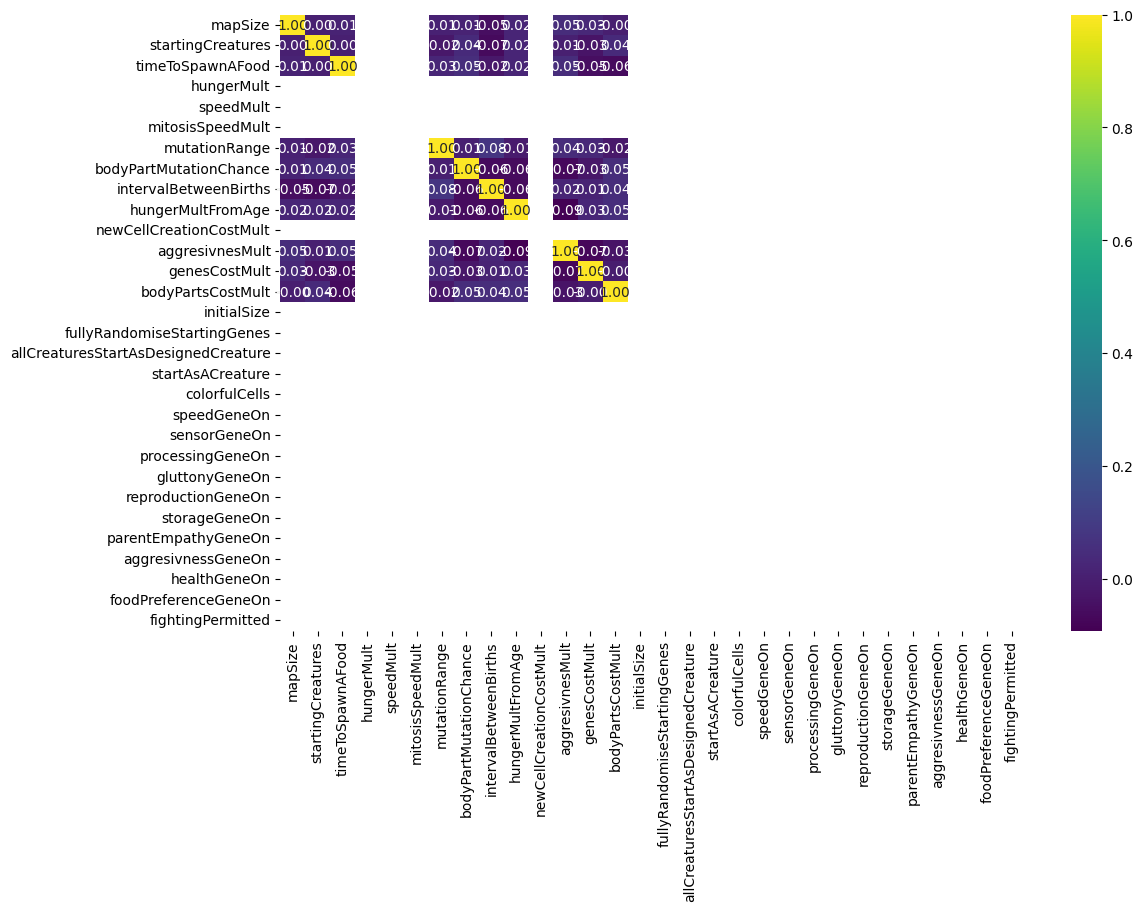

In [6]:
correlation_matrix(initial_parameters)

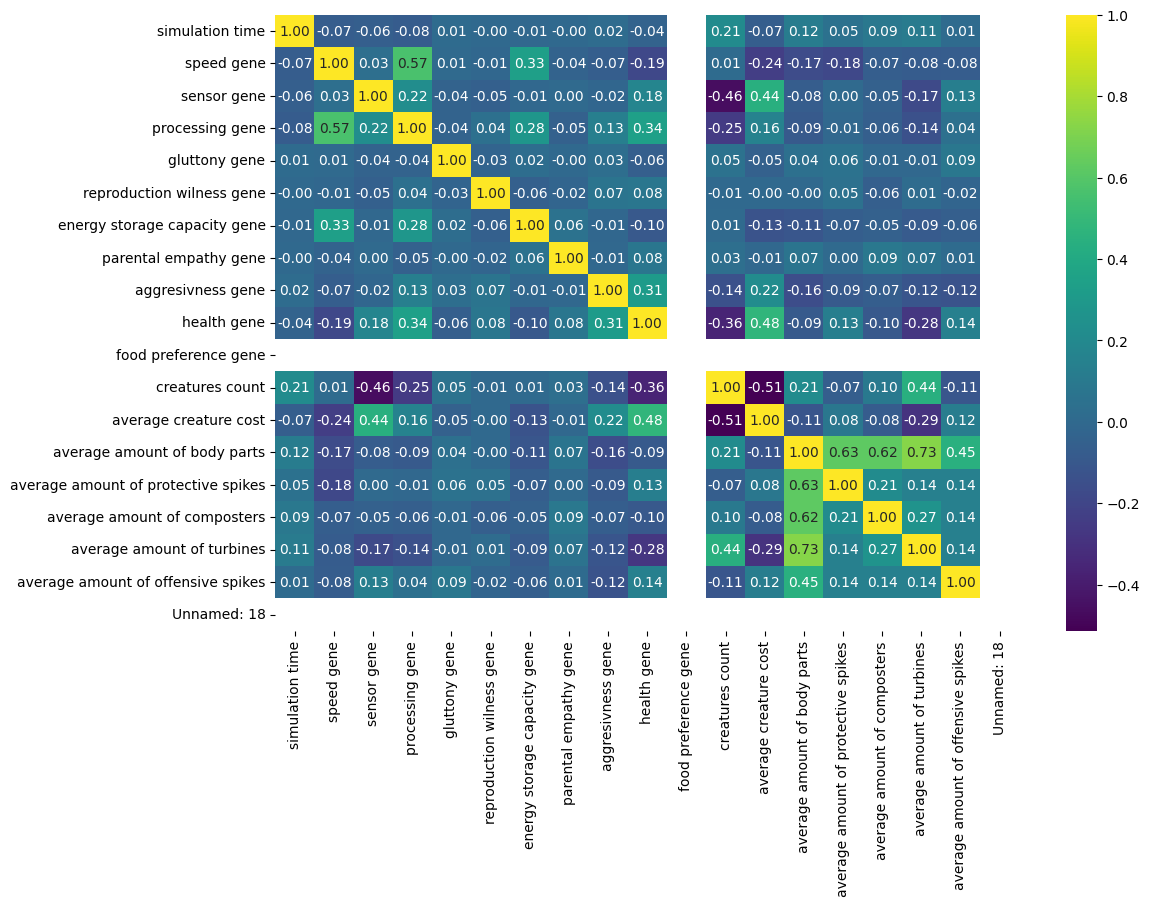

In [7]:
correlation_matrix(results)

It is clear from the data, that many columns can be dropped.

# Cleaning Data

In [8]:
initial_parameters: DataFrame = initial_parameters.drop(
    columns=[
        "hungerMult",
        "speedMult",
        "mitosisSpeedMult",
        "newCellCreationCostMult", 
        "initialSize", 
        "fullyRandomiseStartingGenes", 
        "allCreaturesStartAsDesignedCreature", 
        "startAsACreature",
        "colorfulCells", 
        "speedGeneOn", 
        "sensorGeneOn", 
        "processingGeneOn", 
        "gluttonyGeneOn",
        "reproductionGeneOn", 
        "storageGeneOn", 
        "parentEmpathyGeneOn", 
        "aggresivnessGeneOn", 
        "healthGeneOn", 
        "foodPreferenceGeneOn", 
        "fightingPermitted"
        ]
    ).dropna()

results: DataFrame = results.drop(
    columns=[        
        "simulation time", 
        "food preference gene"
        ]
    )

results = results.loc[:, ~results.columns.str.contains('^Unnamed')]

print()

Simulation time was also dropped, because only simulations, that stopped ~ 4500 simulation seconds (the maximum time), are analysed

In [13]:
print(results.iloc[0])

speed gene                              0.991227
sensor gene                             0.416732
processing gene                         0.814775
gluttony gene                           0.573346
reproduction wilness gene               0.307748
energy storage capacity gene            0.733310
parental empathy gene                   0.345123
aggresivness gene                       0.866806
health gene                             0.861556
creatures count                        18.000000
average creature cost                   1.545005
average amount of body parts            0.000000
average amount of protective spikes     0.000000
average amount of composters            0.000000
average amount of turbines              0.000000
average amount of offensive spikes      0.000000
Name: 9, dtype: float64


In [14]:
print(initial_parameters.iloc[0])

mapSize                   23.761980
startingCreatures         15.000000
timeToSpawnAFood           4.529128
mutationRange              0.383709
bodyPartMutationChance     0.005873
intervalBetweenBirths     64.644820
hungerMultFromAge          0.003437
aggresivnesMult            1.202730
genesCostMult              0.254597
bodyPartsCostMult          0.791882
Name: 0, dtype: float64


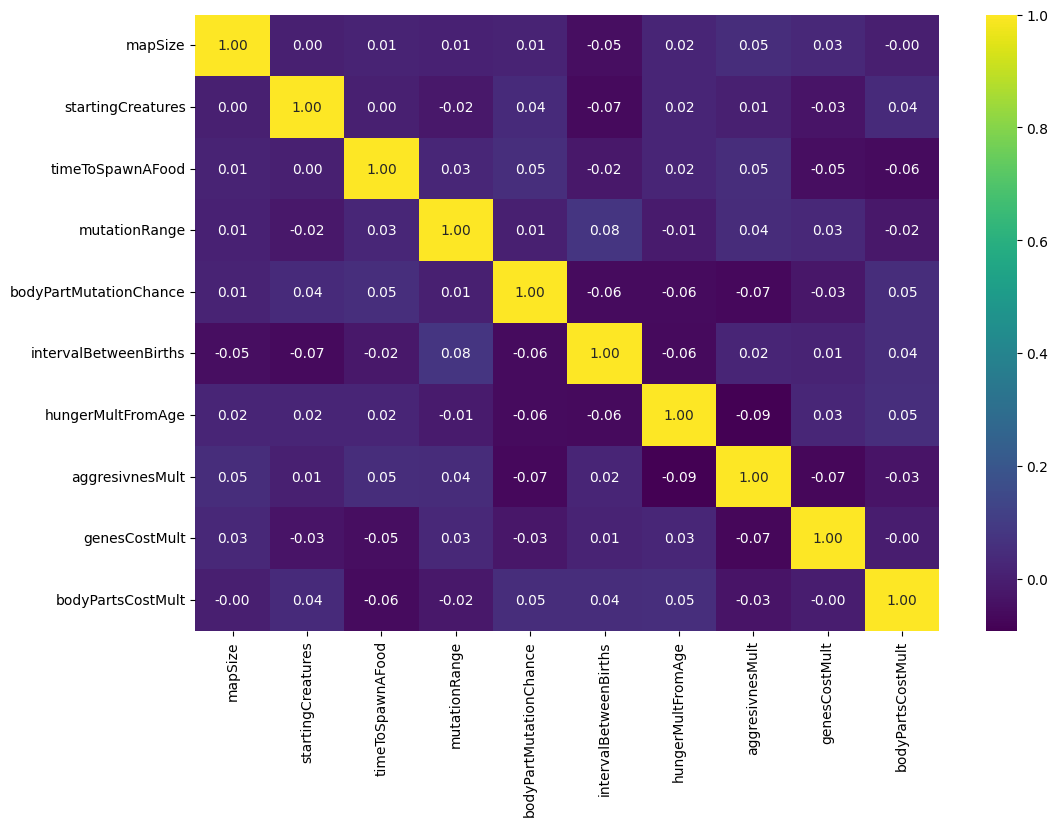

In [11]:
correlation_matrix(initial_parameters)

Correlation of one initial parameter to another is close to zero, as expected. <br>
The initial parameters were generated upon creating the simulation with the help of this custom random power function:

In [12]:
float GenerateRandomValue(float min, float max, float mean)
{
    float meanWeight = meanWeightMultiplier * Random.value;

    float x = (Random.value + .5f * meanWeight) / (1 + meanWeight);

    float value = CustomPowerFunction(x, min, max, mean);

    return value;
}

float CustomPowerFunction(float x, float min, float max, float mean)
{
    float meanInterpolated = (mean - min) / (max - min);

    return Mathf.Pow(x, Mathf.Log(meanInterpolated, 0.5f)) * (max - min) + min;
}

SyntaxError: invalid decimal literal (2305648994.py, line 5)

46.62647485139116


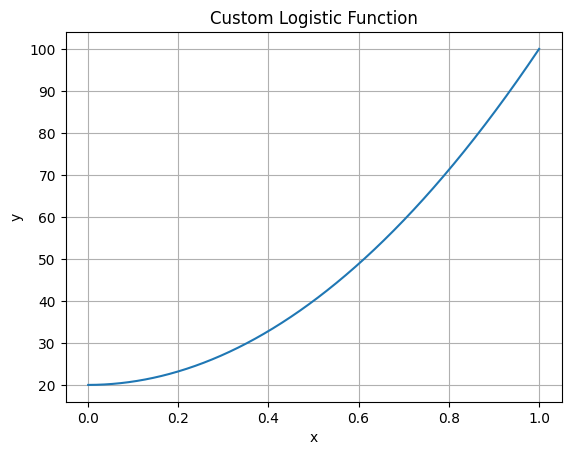

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def custom_logistic(x, mn, mx, mean):    
    m_inter = (mean-mn)/(mx-mn)
       
    return x**math.log(m_inter, 0.5) * (mx-mn) + mn

mn = 20
mx = 100
mean = 40

mnx = (mean - mn) / (mx - mn)

x_values = np.linspace(0.001, 1, 1000)
y_values = custom_logistic(x_values, mn, mx, mean)

suma = 0
for i in range(100000):
    suma += custom_logistic(random.uniform(0., 1.), mn, mx, mean)
print(suma / 100000)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Logistic Function')
plt.grid(True)
plt.show()

The goal was to create a function, that 50% of y values generated are small then the "mean", and another 50% above it. <br>
The average != mean, and for this example, it's closer to 46.6. Still, this is a decent way to generate random initial parameters non-linearly.

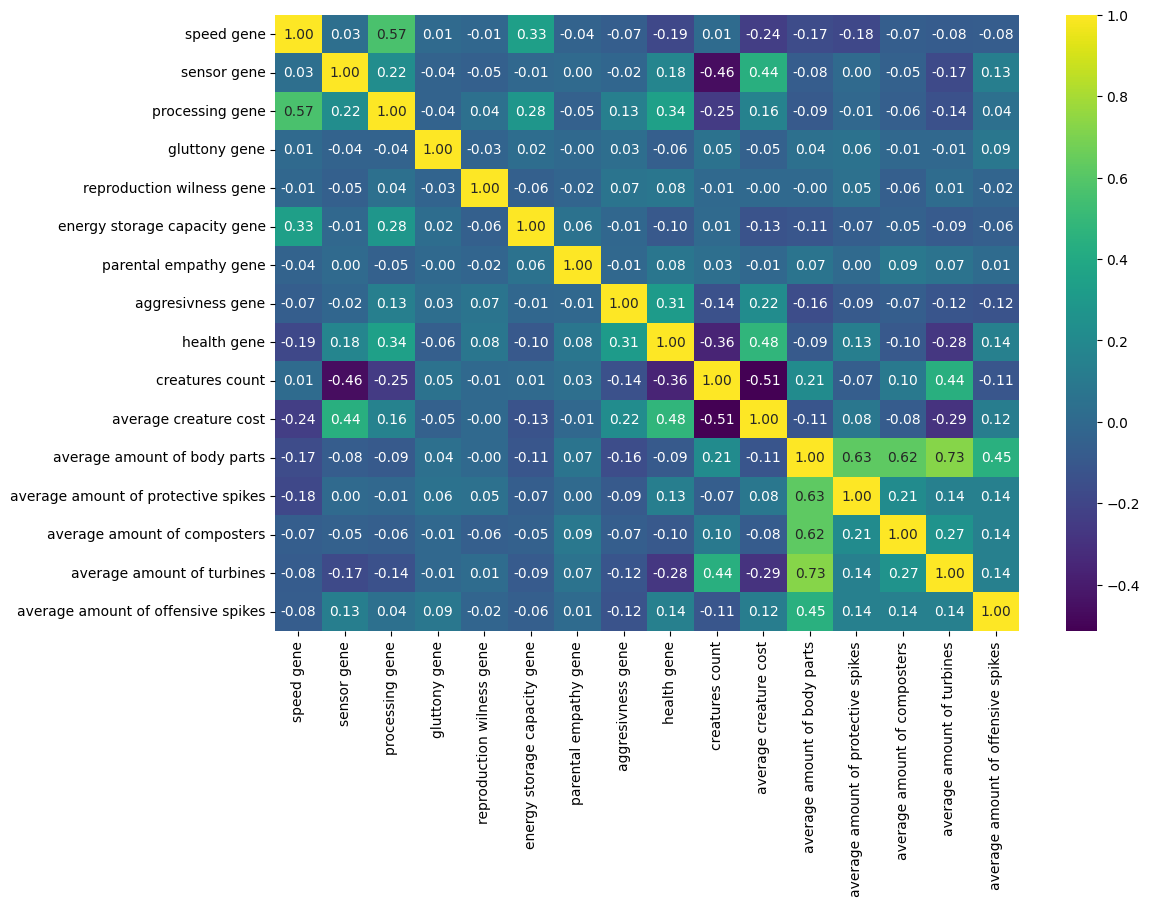

In [ ]:
correlation_matrix(results)

Many interesting correlations can be observed with just this correlation matrix. <br><br>
Some of them are obvious - average amount of body parts is based on the average amounts of other body parts. <br><br>
There are strong negative correlations between creatures count and average creature cost. Also between creatures count and health gene. With more creatures, it's less advantegous to have a better developed sensor gene. <br><br>
A pretty interesting strong correlation is between creature count and average amount of turbines. It seems like with more creatures, it's important to get to food before others. Than again, the same correlation is not observed between creature count and speed gene. There could be many explanations, including an unintentional bug in game - data was collected with simulation speed of 16, which is quite large. Because of that, creatures with high speed can "miss" food, because they have less frames to adjust their movement. Turbines greatly increase turning speed, while the speed gene doesn't.

# Estimating results from initial parameters

In [23]:
train_data_coef = 0.8
train_data_amount = int(len(simulation_results) * train_data_coef)
test_data_amount = len(simulation_results) - train_data_amount

def estimate(model, initial_parameters, results):
    regressed = model.fit(initial_parameters, results)
    return regressed
        
for column in results.columns:
    analyzed_column = results[column]
        
    reg: LinearRegression = estimate(LinearRegression(), initial_parameters[:train_data_amount], analyzed_column[:train_data_amount])
    print(f"{column} : {reg.score(initial_parameters, analyzed_column)}")
    
    #for i in zip(initial_parameters[train_data_amount:], results[train_data_amount:]):
    #    print(f'Predicted: {reg.predict([i[0]])}, Real: {i[1]}')
    
    #plt.scatter(initial_parameter_selected, results)
    #plt.xlabel(convert_str_to_capitalized_words(initial_parameter_name))
    #plt.ylabel(convert_str_to_capitalized_words(result_name))
    #plt.title(f'{convert_str_to_capitalized_words(initial_parameter_name)} vs {convert_str_to_capitalized_words(result_name)}')
    #plt.show()

speed gene : 0.2983322737165245
sensor gene : 0.2696621585443597
processing gene : 0.5708129003182041
gluttony gene : 0.01893258862475844
reproduction wilness gene : 0.00030690374625852446
energy storage capacity gene : 0.17733078999814478
parental empathy gene : 0.05689939591641813
aggresivness gene : 0.07590698171837307
health gene : 0.44932528031413344
creatures count : 0.6874840239854124
average creature cost : 0.4263960264309189
average amount of body parts : 0.492637822258422
average amount of protective spikes : 0.22354959500755178
average amount of composters : 0.21553586356290333
average amount of turbines : 0.3616245024286795
average amount of offensive spikes : 0.15522566297545703
